# No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

<b>Description about the columns:</b>
- <b>PatientId:</b> Identification of a patient
- <b>AppointmentID:</b> Identification of each appointment
- <b>Gender:</b> Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- <b>ScheduledDay:</b> The day of the actuall appointment, when they have to visit the doctor.
- <b>AppointmentDay:</b> The day someone called or registered the appointment, this is before appointment of course.
- <b>Age:</b> How old is the patient.
- <b>Neighbourhood:</b> Where the appointment takes place.
- <b>Scholarship:</b> True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- <b>Hipertension:</b> True or False
- <b>Diabetes:</b> True or False
- <b>Alcoholism:</b> True or False
- <b>Handcap:</b> True or False
- <b>SMS_received:</b> 1 or more messages sent to the patient.
- <b>No-show:</b> ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up..

### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

<i>During the Exploratory Analysis, I found some answers for questions that I didn't thought to ask at begining, as for example, which gender takes care more about their health? Or the age is something important to people when it's about take care of health? So I got my conclusions during the exploratory analisys and sumarized them on the Conclusion part</i>

### Imports and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
df = pd.read_csv('./noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The dataset it's clean... So there is nothing to do about that.

In [6]:
print(sum(df.duplicated()))
print(f'PatientId: {df.PatientId.nunique()}')
print(f'AppointmentID: {df.AppointmentID.nunique()}')
print(f'DataFrame Length: {len(df)}')

0
PatientId: 62299
AppointmentID: 110527
DataFrame Length: 110527


Also doesn't have any duplicated row. There is some duplicated Patient Ids, but each row it's a different appointment. So, moving on.

### Data Cleaning

In [7]:
df = df.rename(columns=lambda x: x.lower())

In [8]:
datetime_cols = ['scheduledday', 'appointmentday']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col]).dt.normalize()

In [9]:
boolean_cols = ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']
for col in boolean_cols:
    df[col] = df[col].astype(bool)

In [10]:
df = df.rename(columns=lambda x: x.lower())
df.rename(columns={
    'hipertension':'hypertension',
    'scheduledday':'scheduled_day',
    'appointmentday':'appointment_day', 
    'handcap':'handicap'
}, inplace=True)

On the above section I changed the columns types and renamed the columns to be on lowercase and correctly spelled. Also separeted words by underscore. 

In [11]:
# Changing the column 'no-show' to 'show' to make easier the understanding
# After that dropping some columns that I don't intend to use

df['showed'] = df['no-show'].map(lambda x: x == 'No')
df.drop(['no-show', 'appointmentid'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patientid        110527 non-null  float64            
 1   gender           110527 non-null  object             
 2   scheduled_day    110527 non-null  datetime64[ns, UTC]
 3   appointment_day  110527 non-null  datetime64[ns, UTC]
 4   age              110527 non-null  int64              
 5   neighbourhood    110527 non-null  object             
 6   scholarship      110527 non-null  bool               
 7   hypertension     110527 non-null  bool               
 8   diabetes         110527 non-null  bool               
 9   alcoholism       110527 non-null  bool               
 10  handicap         110527 non-null  bool               
 11  sms_received     110527 non-null  bool               
 12  showed           110527 non-null  bool               
dtyp

In [13]:
df.describe()

,patientid,age
count,1.105270e+05,110527.000000
mean,1.474963e+14,37.088874
std,2.560949e+14,23.110205
min,3.921784e+04,-1.000000
25%,4.172614e+12,18.000000
50%,3.173184e+13,37.000000
75%,9.439172e+13,55.000000
max,9.999816e+14,115.000000


In [14]:
len(df.query('age < 0'))

1

In [15]:
# As just there is one row with age less than 0, I choosed to drop this row. 

df.drop(df.query('age < 0').index, inplace=True)

In [16]:
df.describe()

,patientid,age
count,1.105260e+05,110526.000000
mean,1.474934e+14,37.089219
std,2.560943e+14,23.110026
min,3.921784e+04,0.000000
25%,4.172536e+12,18.000000
50%,3.173184e+13,37.000000
75%,9.438963e+13,55.000000
max,9.999816e+14,115.000000


In [17]:
df.head()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,2.987250e+13,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,True
1,5.589978e+14,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,True
2,4.262962e+12,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,True
3,8.679512e+11,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,8.841186e+12,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,True


<a id='eda'></a>

## Exploratory Data Analysis

In [18]:
def absolut_scatterplot(df, groupby, hue, axs):
    return (
        df
        .groupby(groupby)[hue]
        .value_counts()
        .rename('count')
        .reset_index()
        .reset_index()
        .sort_values(groupby)
        .pipe((sns.scatterplot,'data'), x='index',y='count',hue=hue, ax=axs)
    );

In [19]:
def propotional_scatterplot(df, groupby, hue, axs):
        return (
        df
        .groupby(groupby)[hue]
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        .reset_index()
        .sort_values(groupby)
        .pipe((sns.scatterplot,'data'), x='index',y='percent',hue=hue, ax=axs)
    );

In [20]:
def proportional_barplot(df, groupby, hue, axs):
        return (
        df
        .groupby(groupby)[hue]
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        .sort_values(groupby)
        .pipe((sns.barplot,'data'), x=groupby,y='percent',hue=hue, ax=axs)
    );

In [21]:
df['showed'].value_counts()

True     88207
False    22319
Name: showed, dtype: int64

In [22]:
# Grouping the people that has at least one of these diseases

disease_cols = ['hypertension', 'diabetes', 'alcoholism', 'handicap']

df['has_disease'] = df[disease_cols].isin([True]).any(axis=1)

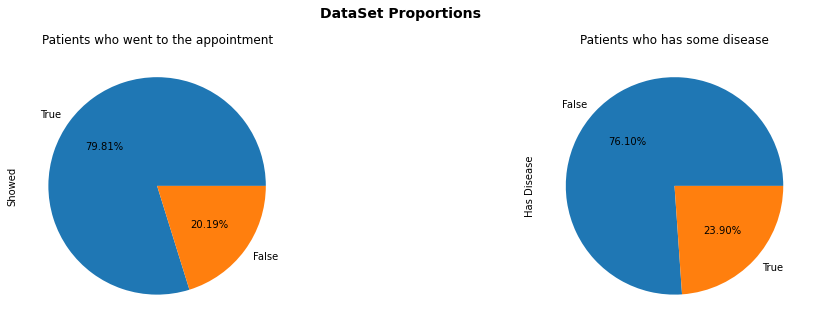

In [23]:
    fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )

df['showed'].value_counts().plot(
    kind='pie',
    autopct='%1.2f%%',
    ax=axs[0]
);

df['has_disease'].value_counts().plot(
    kind='pie',
    autopct='%1.2f%%',
    ax=axs[1]
);

plt.suptitle(f"DataSet Proportions", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='Showed', title='Patients who went to the appointment')
axs[1].set(ylabel='Has Disease', title='Patients who has some disease')
plt.show()

The first observation it's that there is more data about patients that went to the appointment (\~80%) and more data about patients that doens't have any disease (\~76%). But now on I will seek for features that has more compabitility with the target: features that helps to predict if the patient will show on the appointment or not. 

In [24]:
dup_ids = df[df.duplicated()].patientid

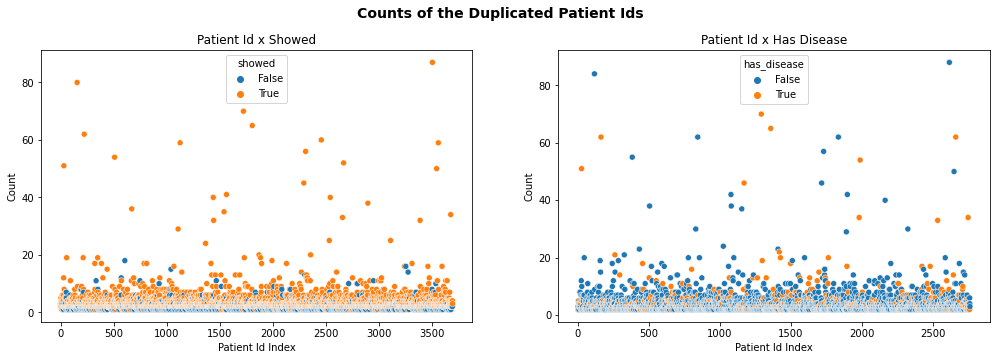

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )

absolut_scatterplot(df[df.patientid.isin(dup_ids)], 'patientid', 'showed', axs[0])
absolut_scatterplot(df[df.patientid.isin(dup_ids)], 'patientid', 'has_disease', axs[1])

plt.suptitle(f"Counts of the Duplicated Patient Ids", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='Count', xlabel='Patient Id Index', title='Patient Id x Showed')
axs[1].set(ylabel='Count', xlabel='Patient Id Index', title='Patient Id x Has Disease')
plt.show()

Most part of the patients that appointed more than once, dont't have any disease and showed on the appointment. So I can ignore this column, because each row really is a unique row, since it's not a reeschedule, but a new schedule.

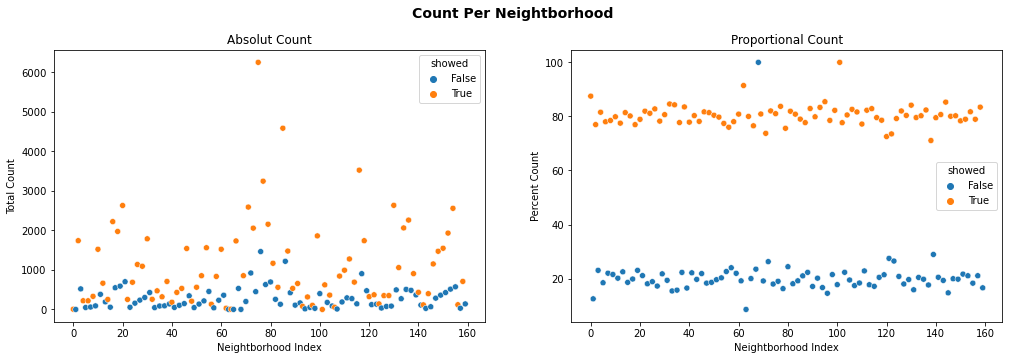

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )

absolut_scatterplot(df, 'neighbourhood', 'showed', axs[0])
propotional_scatterplot(df, 'neighbourhood', 'showed', axs[1])

plt.suptitle(f"Count Per Neightborhood", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='Total Count', xlabel='Neightborhood Index', title='Absolut Count')
axs[1].set(ylabel='Percent Count', xlabel='Neightborhood Index', title='Proportional Count')
plt.show()

Looking on the firt chart (the Absolut Count), we can notice that there is some neighborhoods where the people are scheduling more appointments than others. That's can be because this people are more concerned with their health, or maybe this are neightborhoods where people are sicker than others, being necessary more follow-ups. Or, it's even possible that this are populous neightborhoods. 

Because of that, I make the second chart (the Proportional Count). On this one it's possible to see the real difference count between the neightborhoods. 

For example, if some 'X' neighborhood there was 1000 appointments within 700 patients showing up and 300 don't, and there was an 'Y' neighborhood with 10000 appointments within 7000 patients showing up and 3000 don't, looks like that the neighborhood feature there is something about with the patient showing up or not. But proportinally, the probability it's the same (70% to show and 30% to not).

So, what it's possible to see on the second charts it's that the neighborhood it's not effetive to predict if the patient will show, since all the neighborhoods follow the same score of ~80% of patients going to the appointment and ~20% not. 

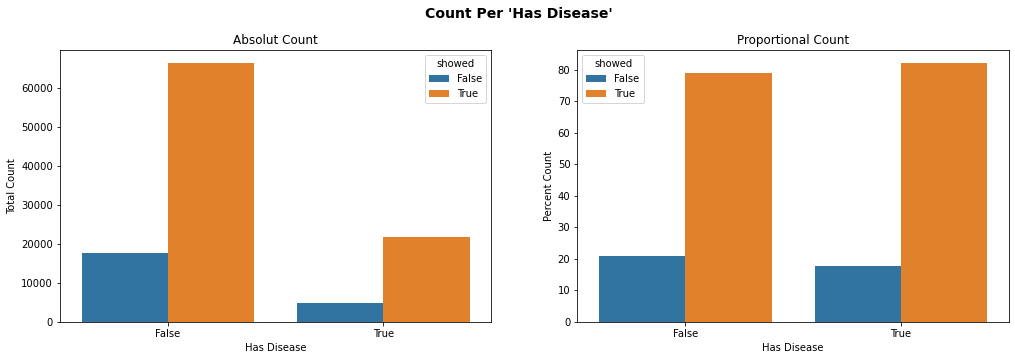

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )

sns.countplot(x='has_disease', hue='showed', data=df, ax=axs[0])
proportional_barplot(df, 'has_disease', 'showed', axs[1])

plt.suptitle(f"Count Per 'Has Disease'", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='Total Count', xlabel='Has Disease', title='Absolut Count')
axs[1].set(ylabel='Percent Count', xlabel='Has Disease', title='Proportional Count')
plt.show()

Looks like that people with good health makes more appointments, but proportionally the people that there is some disease, miss slightly less to their appointments. With a high probability that the reason behind that it's that people with some disease can't miss their appointments. It's necessary follow ups and more frequently check-ups to has sure that their are okay.

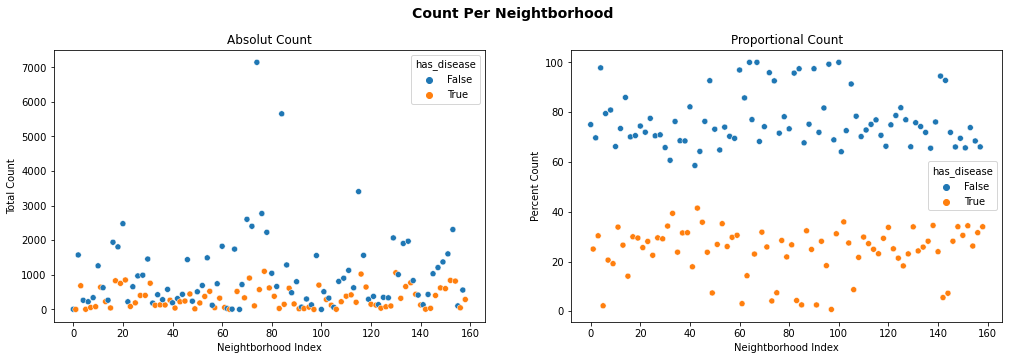

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )

absolut_scatterplot(df, 'neighbourhood', 'has_disease', axs[0])
propotional_scatterplot(df, 'neighbourhood', 'has_disease', axs[1])

plt.suptitle(f"Count Per Neightborhood", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='Total Count', xlabel='Neightborhood Index', title='Absolut Count')
axs[1].set(ylabel='Percent Count', xlabel='Neightborhood Index', title='Proportional Count')
plt.show()

I tryed to find some relationship between the neighborhood and the disease levels, and there is some neighborhoods with higher levels of diseased people, but it's not a relevant relationship since the indices are not discrepant. 

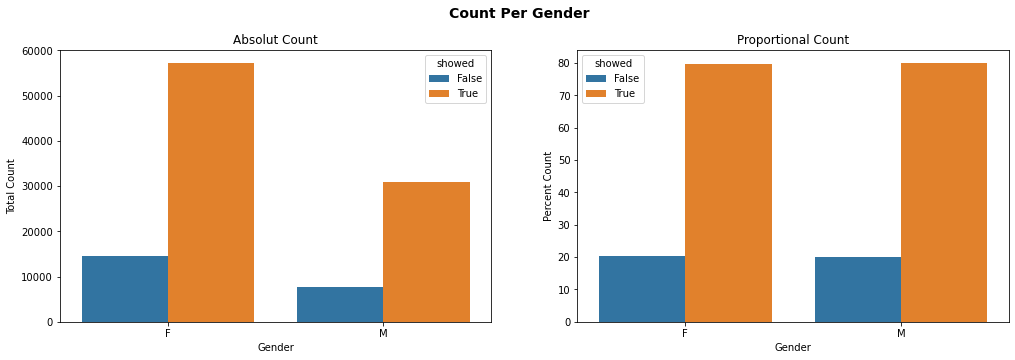

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )


sns.countplot(x='gender', hue='showed', data=df, ax=axs[0])
proportional_barplot(df, 'gender', 'showed', axs[1])

plt.suptitle(f"Count Per Gender", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='Total Count', xlabel='Gender', title='Absolut Count')
axs[1].set(ylabel='Percent Count', xlabel='Gender', title='Proportional Count')
plt.show()

It's interesting to notice that women takes more care about their health than the men. But as the neighborhood, it's not a effective feature to predict if the patient will go on the appointment. 

Althought, would be a good idea to focus on advertisings for men to improve the levels of mens that go make some checkups and take care of their healths.

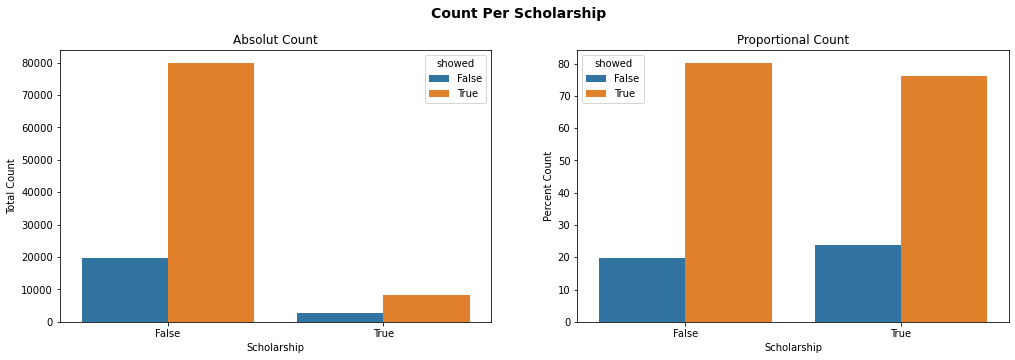

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )


sns.countplot(x='scholarship', hue='showed', data=df, ax=axs[0])
proportional_barplot(df, 'scholarship', 'showed', axs[1])

plt.suptitle(f"Count Per Scholarship", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='Total Count', xlabel='Scholarship', title='Absolut Count')
axs[1].set(ylabel='Percent Count', xlabel='Scholarship', title='Proportional Count')
plt.show()

The scholarship it's the most disproportional feature until now on the dataset. Just a few has the scholarship and even though, the people that doens't have, miss less their appointments.

In [31]:
df.groupby(['has_disease', 'showed']).age.mean()

has_disease  showed
False        False     28.461115
             True      31.059148
True         False     56.177905
             True      58.426069
Name: age, dtype: float64

In [32]:
df.groupby(['has_disease', 'showed']).age.median()

has_disease  showed
False        False     26.0
             True      30.0
True         False     57.0
             True      59.0
Name: age, dtype: float64

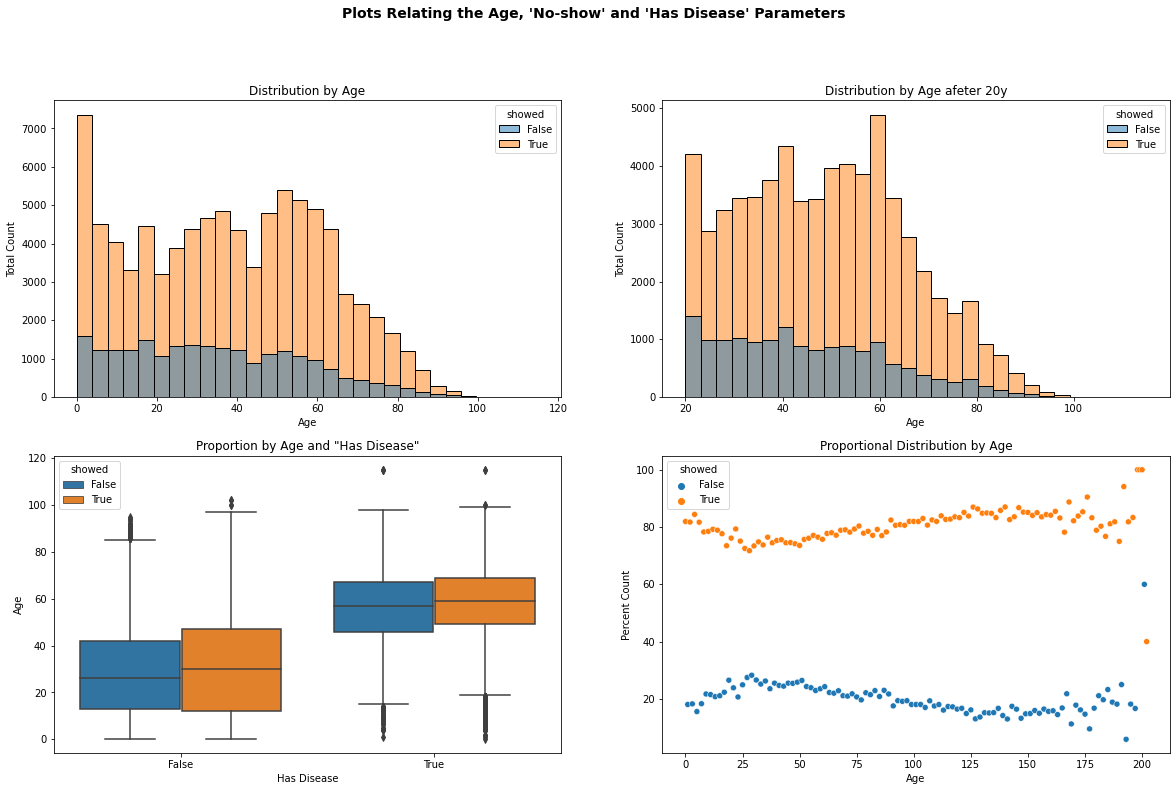

In [33]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 12), )

sns.histplot(x='age', hue='showed', data=df, bins=30, ax=axs[0][0]);
sns.histplot(x='age', hue='showed', data=df[df.age >= 20], bins=30, ax=axs[0][1]);
sns.boxplot(y='age', x='has_disease', hue='showed', data=df, ax=axs[1][0]);
propotional_scatterplot(df, 'age', 'showed', axs[1][1])

plt.suptitle(f"Plots Relating the Age, 'No-show' and 'Has Disease' Parameters", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0][0].set(ylabel='Total Count', xlabel='Age', title='Distribution by Age')
axs[0][1].set(ylabel='Total Count', xlabel='Age', title='Distribution by Age afeter 20y')
axs[1][0].set(ylabel='Age', xlabel='Has Disease', title='Proportion by Age and "Has Disease"')
axs[1][1].set(ylabel='Percent Count', xlabel='Age', title='Proportional Distribution by Age')

plt.show()

When taking the age feature, there is some interesting points to go throught. 
1. At the first chart we can notice that the most part of the appointments were to "kids"(people with less than 20 years old). People that probably it's the parents that are setting the appointments and taking the kids. So, the indices of the ones that don't apperead on the scheduled day, it's probably because the parents couldn't take them there. 
2. If we remove the people with less then 20y's data, we see that there is some peaks of appointments at 20, 40 and 60y old. But after the 60s, the appointments go on a decreasing trend. This makes sense, since the life expectancy on Brazil it's 70/75y. 
3. Beyond some outliers, we can see a relationship between the age and the disease feature. As the people get older, the probability of has some disease get higher. But as we can confirm on the fourth chart, the age it's not a crutial feature to determine if the person will show on the appointment. There is a small relationship since the probability of showing up get a increase trend near the 20s, but it's not a feature that can determine something for sure.

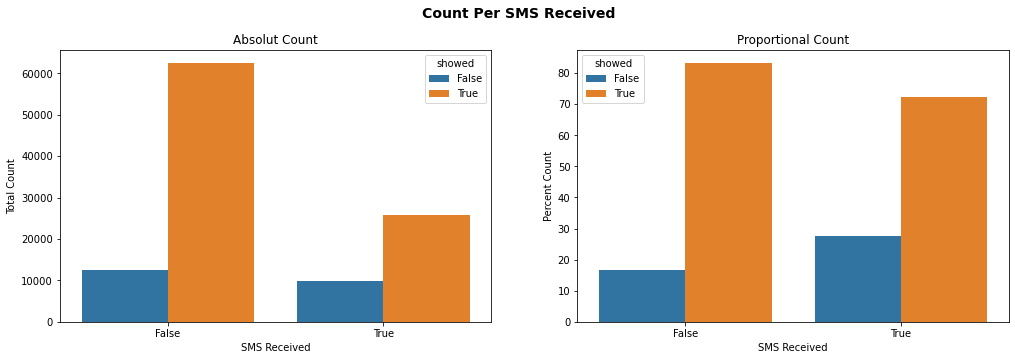

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )


sns.countplot(x='sms_received', hue='showed', data=df, ax=axs[0])
proportional_barplot(df, 'sms_received', 'showed', axs[1])

plt.suptitle(f"Count Per SMS Received", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='Total Count', xlabel='SMS Received', title='Absolut Count')
axs[1].set(ylabel='Percent Count', xlabel='SMS Received', title='Proportional Count')
plt.show()

The most part of the people didn't received the sms, and in a impressive way, the people that received the remember message missed more appointments that the people that didn't received any message. So it's not a feature that would be so good to predict if people will show on their appointments.

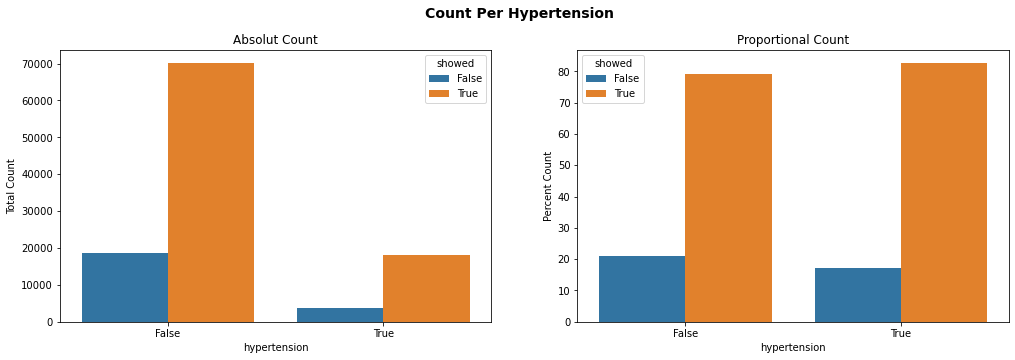

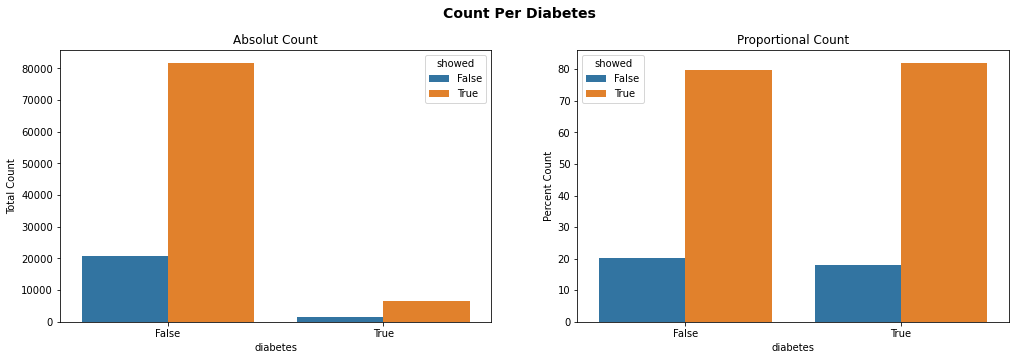

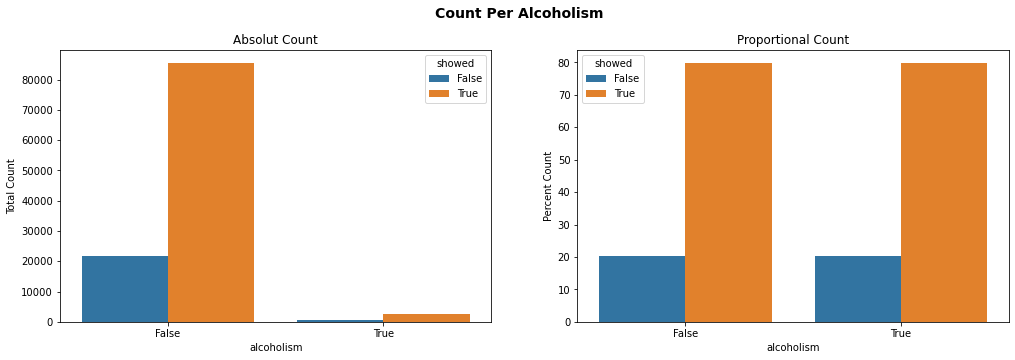

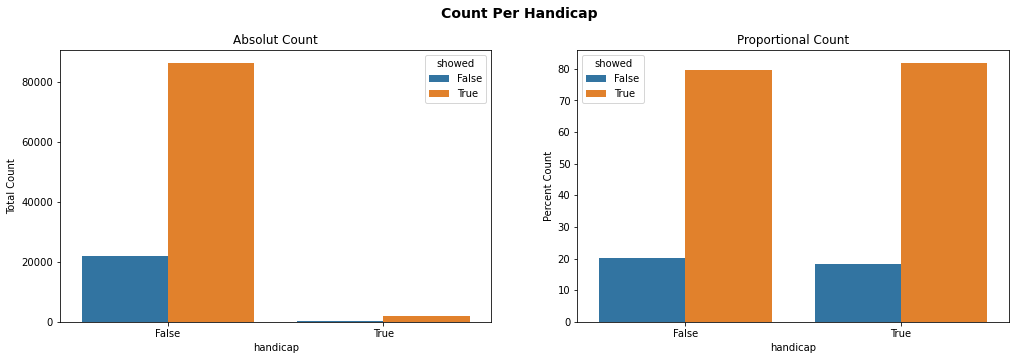

In [35]:
for col in disease_cols:
    
    fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )

    sns.countplot(x=col, hue='showed', data=df, ax=axs[0])
    proportional_barplot(df, col, 'showed', axs[1])

    plt.suptitle(f"Count Per {col.title()}", 
                 horizontalalignment='center', verticalalignment='center', 
                 fontweight='bold', fontsize='14')

    axs[0].set(ylabel='Total Count', xlabel=col, title='Absolut Count')
    axs[1].set(ylabel='Percent Count', xlabel=col, title='Proportional Count')
    plt.show()

As noticed on the begining, there is just a few data of people with some diseases. But proportionally we see that the chances of someone skip the appointment it's almost the same for people that has alcohoslism and people that don't. 

For the other diseases, there is a slightly smaller chance of people don't show to their appointments, with Hypertension being the one with smaller indices of people skipping the schedules.

In [36]:
df['date_diff'] = (df.appointment_day - df.scheduled_day).dt.days
df['appointment_weekday'] = df.appointment_day.dt.day_of_week
df['schedule_weekday'] = df.scheduled_day.dt.day_of_week

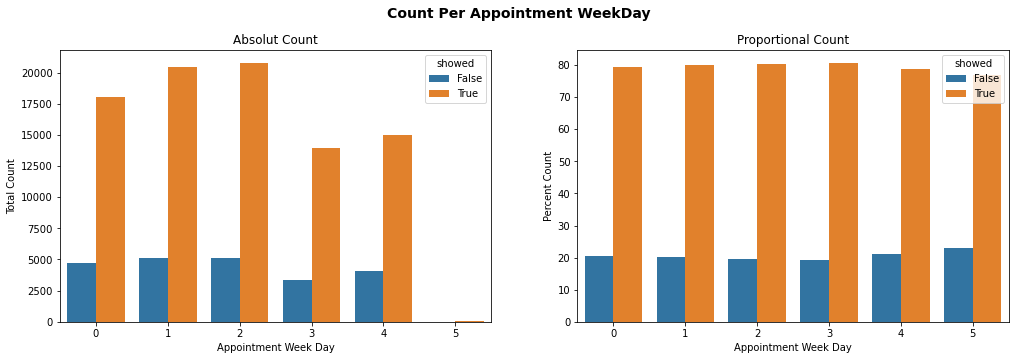

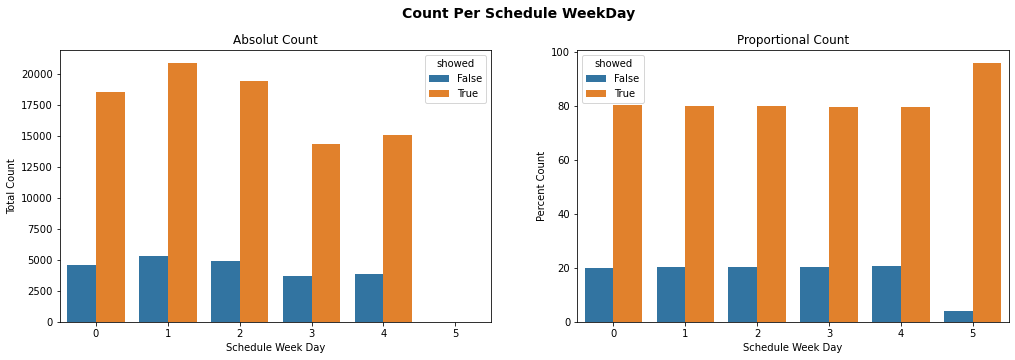

In [37]:
# Appointment Day of Week Charts
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )

sns.countplot(x='appointment_weekday', hue='showed', data=df, ax=axs[0])
proportional_barplot(df, 'appointment_weekday', 'showed', axs[1])

plt.suptitle(f"Count Per Appointment WeekDay", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='Total Count', xlabel='Appointment Week Day', title='Absolut Count')
axs[1].set(ylabel='Percent Count', xlabel='Appointment Week Day', title='Proportional Count')
plt.show()

# Schedule Day of Week Charts
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )


sns.countplot(x='schedule_weekday', hue='showed', data=df, ax=axs[0])
proportional_barplot(df, 'schedule_weekday', 'showed', axs[1])

plt.suptitle(f"Count Per Schedule WeekDay", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='Total Count', xlabel='Schedule Week Day', title='Absolut Count')
axs[1].set(ylabel='Percent Count', xlabel='Schedule Week Day', title='Proportional Count')
plt.show()

For understanding reasons, I used the day of week as number to organize better the chart. For this, take "0" as Monday, "1" as Tuesday, and so on.

What we can take from this visualization it's that people prefer to do their appointments at the begining of the week, with the preferences for Wednesdays, but prefer to schedule for Tuesdays. Also, the people who appointed on Saturday has more chances to skip the appointment, althougth the thing it's people who scheduled for Saturdays, goes way more on their appointments.

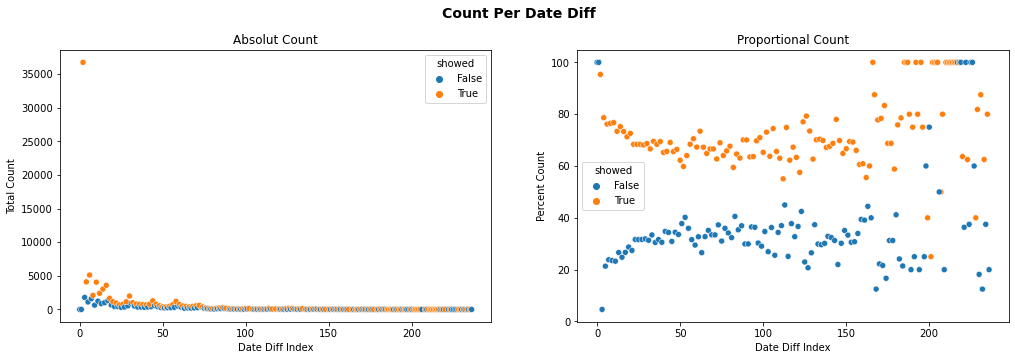

In [38]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )

absolut_scatterplot(df, 'date_diff', 'showed', axs[0])
propotional_scatterplot(df, 'date_diff', 'showed', axs[1])

plt.suptitle(f"Count Per Date Diff", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='Total Count', xlabel='Date Diff Index', title='Absolut Count')
axs[1].set(ylabel='Percent Count', xlabel='Date Diff Index', title='Proportional Count')
plt.show()

There is a small trend of dispersion. While the difference between the scheduled day and the appointment day growth, the probability of people not show to the appointment get bigger, but also, after a difference of almost 100 days, the probability gets to dispersed.

In [39]:
df.corr()['showed']*100

patientid                0.145565
age                      6.032682
scholarship             -2.913358
hypertension             3.570351
diabetes                 1.518123
alcoholism               0.019685
handicap                 0.728141
sms_received           -12.642794
showed                 100.000000
has_disease              3.263408
date_diff              -18.622837
appointment_weekday     -0.115845
schedule_weekday        -0.601410
Name: showed, dtype: float64

Looking for the correlation indices above, we can confirm that any of these features doesn't has a effective power to predict if the patient will attend their schedules. But we see that appereantly, schedule the appointments with a small range of days, would make them attend more.

<a id='conclusions'></a>
## Conclusions

First, it's necessary consider that the data was nos well distributed for take answers of the main question. There was more data of patients that went to their appointmentes than the inverse. 

So, because of these limitation, I can't raise a definitive answer. I believe that with more data, I would be able to take best trends with these given features. Also, maybe if manipulate these features between them would be able to discover new things. 

But, what I can say it's that people with lethal diseases as hypertension and diabetes, skips less to their appointments. Also, older people trend to attend more. This can be for some reases as, maybe, their have more available time or they care more about their health because they are statistical nearer of death.

It's interesting that women goes more to the doctor. Maybe this is a good reason for that men live less. But it's even more interesting to see that there is more data about people with good health going to the doctor than with some disease. I'm not able to infer a reason for that... Would be necessary other features and data to understand why that.